In [1]:
"""
This Jupyter notebook contains code for finding the average scores by genre
based on the 'imdb_movies.csv' dataset available in kaggle. This code also
finds the best movies of the best genre and the worst of the worst genre, and
finally also the top-rated genre combination.
"""

# First, import libraries that are used
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### In this cell, the data from 'imdb_movies.csv' is prepared for analysis

# Load the .csv file into a Pandas DataFrame object
df = pd.read_csv('imdb_movies.csv')

# Filter out movies released after 2020
# Before that, convert the release dates to datetime format for easier filtering
df['date_x'] = pd.to_datetime(df['date_x'], errors='coerce')
df = df[df['date_x'].dt.year <= 2020]

# Clean the genre labels by filling empty values and replacing unicode characters '\xa0'
df['genre'] = df['genre'].fillna('No Genre Assigned')
df['genre'] = df['genre'].str.replace('\xa0', ' ')

# Extract the genres and scores to own variables as well
genres = df['genre']
scores = df['score']

/opt/software/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/software/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/software/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/software/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWa

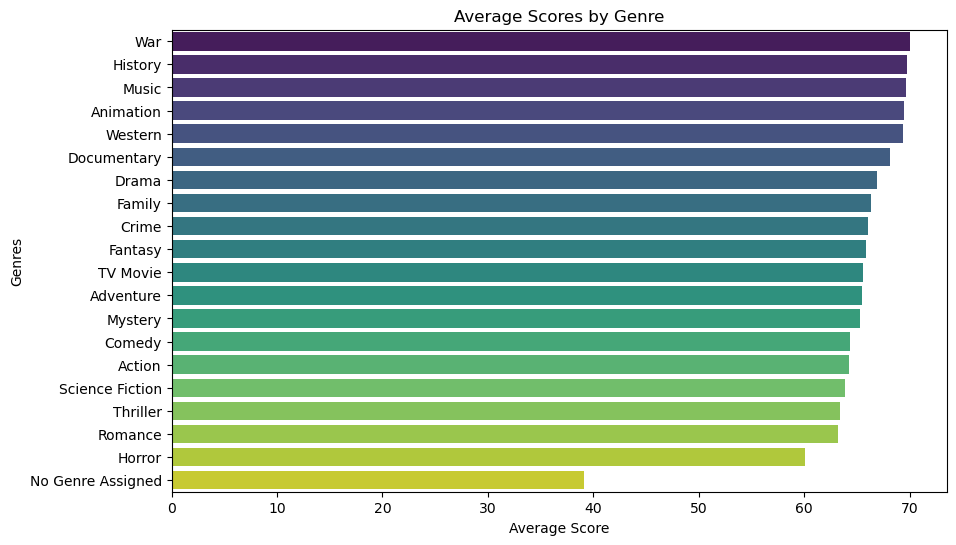

In [3]:
### Here, for each genre, scores are collected from each movie with that genre.
### The scores are averaged within the genres and the average scores are displayed
### in a plot. (The output might give a warning that this code might not work with
### future version of pandas. I was not able to resolve the issue.)

# Create a dictionary with lists as default values, the lists will contain the scores of each genre
genre_scores = defaultdict(list)

# Loop through the genres and scores of each movie in 'df'
for genre_list, score in zip(genres, scores):
    for genre in genre_list.split(', '):   # Go through all the genres of a movie individually
        genre_scores[genre].append(score)   # Append a score for the genre in question

# Calculate the average score for each genre
average_scores = {genre: sum(scores) / len(scores) for genre, scores in genre_scores.items()}

# Convert the average_scores dictionary to a Pandas DataFrame object for easier plotting
average_scores_df = pd.DataFrame(list(average_scores.items()), columns=['Genre', 'Average Score'])

# Sort the average scores for a clearer plot
average_scores_df = average_scores_df.sort_values(by='Average Score', ascending=False)

# Plot the average scores of each genre using seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Average Score', y='Genre', data=average_scores_df, palette='viridis', hue='Genre', dodge=False, legend=False)
plt.xlabel('Average Score')
plt.ylabel('Genres')
plt.title('Average Scores by Genre')
plt.show()

In [4]:
### Here, the code finds the best movies of the best genre
### and the worst movies of the worst genre

# Find the best and worst genres, ignore the movies without an assigned genre
best_genre = average_scores_df.iloc[0]['Genre']
worst_genre = average_scores_df.iloc[-2]['Genre']

# Filter the movies by the best and worst genres
best_genre_movies = df[df['genre'].apply(lambda x: best_genre in str(x))]
worst_genre_movies = df[df['genre'].apply(lambda x: worst_genre in str(x))]

# Sort the movies by their scores and take the top 5 and the worst 5
top_movies_best_genre = best_genre_movies.sort_values(by='score', ascending=False, na_position='last').head(5)
worst_movies_worst_genre = worst_genre_movies.sort_values(by='score', na_position='last').head(5)

# Print tables of the best and worst movies and their scores
print(f"Top movies in the best genre ({best_genre}):")
print(top_movies_best_genre[['names', 'score']])

print(f"\nWorst movies in the worst genre ({worst_genre}):")
print(worst_movies_worst_genre[['names', 'score']])


Top movies in the best genre (War):
                 names  score
1552  Schindler's List   86.0
1594       The Pianist   84.0
3687      Come and See   83.0
2445    Apocalypse Now   83.0
6247    Paths of Glory   83.0

Worst movies in the worst genre (Horror):
                              names  score
2118     Chinese Erotic Ghost Story   20.0
6687  I Spit on Your Grave: Déjà Vu   30.0
7618              Alone in the Dark   33.0
8075                     Dracula 3D   33.0
7535    Children of the Living Dead   34.0


In [5]:
### Here, the code finds the best rated genre combination

# Create a new dictionary with lists as default values
genre_scores = defaultdict(list)

# Loop through the genres and scores, but this time don't split the genres even if a movie has multiple genres
for genre_list, score in zip(genres, scores):
    genre_scores[genre_list].append(score)

# Calculate the average score for each genre
average_scores = {genre: sum(scores) / len(scores) for genre, scores in genre_scores.items()}

# Find the genre with the highest average score
highest_avg_genre = max(average_scores, key=average_scores.get)
highest_avg_score = average_scores[highest_avg_genre]

print(f"The genre combination with the highest average score is {highest_avg_genre} with an average score of {highest_avg_score:.2f}")


The genre combination with the highest average score is Romance, Animation, Drama with an average score of 85.00
